# Hospital Cost Report Analysis 2021
In this notebook, we will perform a basic analysis of the hospital cost data for 2021. 
The goal is to familiarize you with some fundamental data analysis techniques using Python 
and the pandas library.

Whenever we start with a new dataset, it is always a good idea to start with reading the data dictionary if it exists. 
Then after that, based on what we have learned from the data dictionary, we can then begin with the following steps as a example: 
- Load the data
- Check the first few rows of the data
- Check the data types of the columns
- Check the summary statistics of the data
- Check for missing values
- Check for duplicates
- Check for unique values in the columns
- Check for the distribution of the data
- Check for outliers
- Check for the relationship between the columns
- Check for the correlation between the columns
- Check for the trends in the data

In [54]:
## install necessary packages

import pandas as pd
import matplotlib.pyplot as plt


## Data Loading
The first step in any data analysis task is to load the data. 
We will use the pandas library to load our CSV file into a DataFrame. 
A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

In [32]:
import pandas as pd



# Load the CSV file into a DataFrame

file_path = '/Users/hantswilliams/Development/python/sbm-resident-programming-2024/Code/Wk2/data/CostReport_2021_Final.csv'

data = pd.read_csv(file_path)



# Display the first few rows of the DataFrame to get an overview of the data

data.head()

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone CHIP,Stand-Alone CHIP Charges
0,692984,441314,LAUDERDALE COMMUNITY HOSPITAL,326 ASBURY RD,RIPLEY,TN,38063,LAUDERDALE,99944.0,R,...,-773505.0,301956.0,-471549.0,NaN,-471549.0,0.361058,479217.0,1064927.0,NaN,NaN
1,695374,341317,LIFEBRITE COMMUNITY HOPITAL OF STOK,1570 NC 8 & 89 HWY N,DANBURY,NC,27016,STOKES,49180.0,U,...,-4033449.0,234601.0,-3798848.0,686278.0,-4485126.0,0.421393,231778.0,1874083.0,NaN,NaN
2,695408,511320,JACKSON GENERAL HOSPITAL,122 PINNELL STREET,RIPLEY,WV,25271,JACKSON,16620.0,U,...,181818.0,102711.0,284529.0,NaN,284529.0,0.505269,1801712.0,4144931.0,34568.0,71503.0
3,695541,520011,LAKEVIEW MEDICAL CENTER OF RICE LAKE,1700 WEST STOUT STREET,RICE LAKE,WI,54868-,BARRON,99952.0,R,...,4215888.0,2218308.0,6434196.0,322078.0,6112118.0,0.414683,3143336.0,12510167.0,NaN,NaN
4,695846,520037,MARSHFIELD MEDICAL CENTER,611 ST JOSEPH AVENUE,MARSHFIELD,WI,54449,NaN,99952.0,R,...,-47169951.0,44969213.0,-2200738.0,NaN,-2200738.0,0.379718,17596973.0,58987228.0,NaN,NaN


## Basic Data Exploration
Let's explore the dataset by viewing its size, checking for missing values, and understanding the types of data it contains.

In [33]:
# Display the shape of the DataFrame

data.shape


# Display basic information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6051 entries, 0 to 6050
Columns: 117 entries, rpt_rec_num to Stand-Alone CHIP Charges
dtypes: float64(103), int64(4), object(10)
memory usage: 5.4+ MB


## Data Cleaning Basics
Data cleaning is crucial before performing any analysis. We might need to handle missing values 
or drop columns that are not relevant to our analysis.

In [34]:
# Example of dropping columns

print('Total columns before dropping:', len(data.columns))

columns_to_drop = ['Street Address', 'County']

data_cleaned = data.drop(columns=columns_to_drop)

print('Total columns after dropping:', len(data_cleaned.columns))


Total columns before dropping: 117
Total columns after dropping: 115


In [35]:
# Handling missing values by filling them with a placeholder

# For numeric columns, we can fill missing values with 0 or the column mean

## get a sum of missing values for each column
missing_values = data_cleaned.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)


Outlier Payments For Discharges                        6051
DRG Amounts Other Than Outlier Payments                6051
Hospital Total Days Title V For Adults & Peds          5926
Hospital Total Discharges Title V For Adults & Peds    5919
Total Discharges Title V                               5919
                                                       ... 
Fiscal Year Begin Date                                    0
Type of Control                                           0
State Code                                                0
Zip Code                                                  0
rpt_rec_num                                               0
Length: 115, dtype: int64
Total missing values after filling: 0


In [ ]:
# Handling missing values by filling them with a placeholder

# For numeric columns, we can fill missing values with 0 or the column mean
data_cleaned.fillna(0, inplace=True)

print('Total missing values after filling:', data_cleaned.isnull().sum().sum())

## Simple Analysis
Now that our data is cleaner, we can perform some simple analysis. 
Let's calculate some summary statistics and visualize the distribution of hospitals by state.

In [36]:
# Group by 'State Code' and count the number of hospitals in each state

hospital_counts_by_state = data_cleaned.groupby('State Code')['Provider CCN'].count()

hospital_counts_by_state


State Code
AK     24
AL    114
AR    103
AS      1
AZ    121
CA    412
CO    105
CT     39
DC     12
DE     14
FL    253
GA    166
GU      2
HI     26
IA    122
ID     52
IL    205
IN    168
KS    147
KY    115
LA    209
MA     99
MD     60
ME     40
MI    159
MN    141
MO    137
MS    107
MT     67
NC    132
ND     50
NE     96
NH     32
NJ     96
NM     56
NV     55
NY    190
OH    232
OK    146
OR     63
PA    216
PR     60
RI     15
SC     88
SD     60
TN    141
TX    577
UT     58
VA    108
VI      2
VT     16
WA    104
WI    149
WV     60
WY     29
Name: Provider CCN, dtype: int64

In [37]:
# Now instead of group, we will use the pivot_table method to achieve the same result

hospital_counts_by_state_pivot = data_cleaned.pivot_table(index='State Code', values='Provider CCN', aggfunc='count')

hospital_counts_by_state_pivot

,Provider CCN
State Code,
AK,24
AL,114
AR,103
AS,1
AZ,121
CA,412
CO,105
CT,39
DC,12


In [38]:
# Now building off of the pivot, we will also include the average 'Number of Internsand Residents (FTE)' for each state

hospital_counts_and_residents = data_cleaned.pivot_table(index='State Code', values=['Provider CCN', 'Number of Interns and Residents (FTE)'], aggfunc={'Provider CCN': 'count', 'Number of Interns and Residents (FTE)': 'mean'})

hospital_counts_and_residents

,Number of Interns and Residents (FTE),Provider CCN
State Code,,
AK,1.187500,24
AL,12.172018,114
AR,8.626602,103
AS,0.000000,1
AZ,15.432562,121
CA,29.100922,412
CO,14.134000,105
CT,60.289487,39
DC,134.528333,12


## Visualization
Visualizing data helps to understand the distribution and relationships between variables. 
Let's create a simple plot showing the number of hospitals by state.

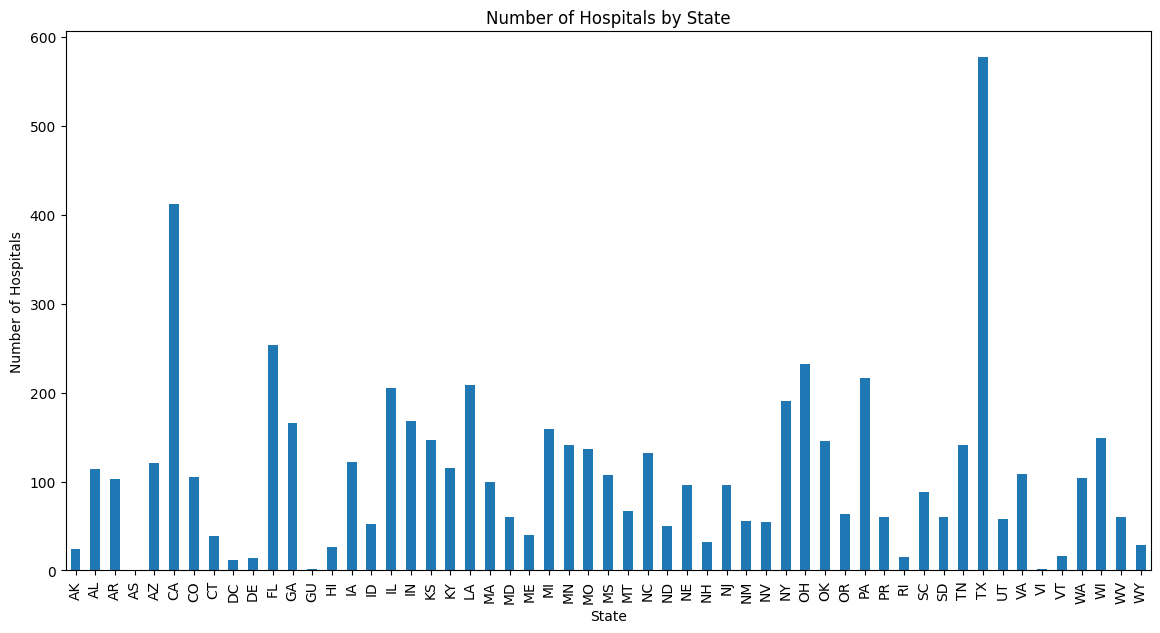

In [39]:
# Plotting the number of hospitals by state

hospital_counts_by_state.plot(kind='bar', figsize=(14, 7))

plt.title('Number of Hospitals by State')

plt.xlabel('State')

plt.ylabel('Number of Hospitals')

plt.show()

<Axes: ylabel='Provider CCN'>

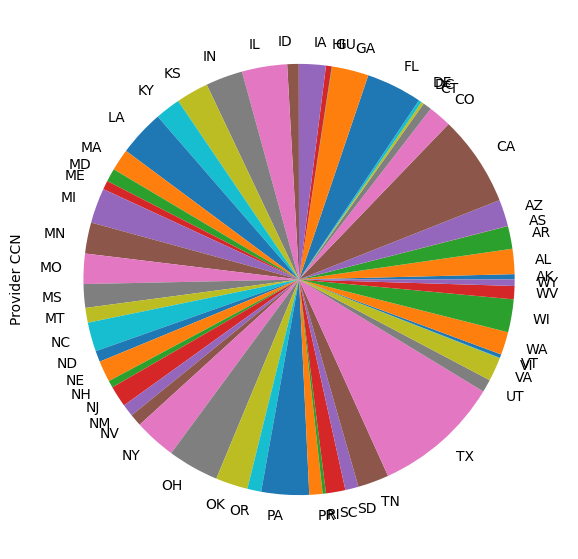

In [41]:
## now lets create a pie chart

hospital_counts_by_state.plot(kind='pie', figsize=(14, 7))

In [44]:
## now lets get some basic descriptives on 'Inpatient Revenue' 

inpatient_revenue_descriptives = data_cleaned['Inpatient Revenue'].describe()

## lets turn off scientific notation for the data
pd.options.display.float_format = '{:,.2f}'.format

inpatient_revenue_descriptives

count            6,051.00
mean       407,361,313.44
std        952,802,929.58
min                  0.00
25%         14,133,640.50
50%         61,843,790.00
75%        371,464,033.50
max     17,869,192,413.00
Name: Inpatient Revenue, dtype: float64

In [46]:
## Based on inpatient_revenue_descriptives, lets keep the values for 25, 50, and 75 percentiles

inpatient_revenue_percentiles = inpatient_revenue_descriptives[['25%', '50%', '75%']]

percentile_25 = inpatient_revenue_percentiles['25%']
percentile_50 = inpatient_revenue_percentiles['50%']
percentile_75 = inpatient_revenue_percentiles['75%']

print('25th percentile:', percentile_25)
print('50th percentile:', percentile_50)
print('75th percentile:', percentile_75)

25th percentile: 14133640.5
50th percentile: 61843790.0
75th percentile: 371464033.5


In [47]:
## lets now create a new variable that indicates whether the 'Inpatient Revenue' is low, medium, or high based on the percentiles

## first lets create a new column in the DataFrame that indicates the category for each hospital
data_cleaned['Inpatient Revenue Category'] = None

## now lets loop through the DataFrame and assign the category based on the percentiles
for index, row in data_cleaned.iterrows():
    if row['Inpatient Revenue'] <= percentile_25:
        data_cleaned.at[index, 'Inpatient Revenue Category'] = 'Low'
    elif row['Inpatient Revenue'] <= percentile_50:
        data_cleaned.at[index, 'Inpatient Revenue Category'] = 'Medium'
    elif row['Inpatient Revenue'] <= percentile_75:
        data_cleaned.at[index, 'Inpatient Revenue Category'] = 'High'
    else:
        data_cleaned.at[index, 'Inpatient Revenue Category'] = 'Very High'

print(data_cleaned['Inpatient Revenue Category'].head())

0     Low
1     Low
2     Low
3     Low
4    High
Name: Inpatient Revenue Category, dtype: object


In [48]:
## now lets do frequency counts for the new variable

inpatient_revenue_category_counts = data_cleaned['Inpatient Revenue Category'].value_counts()
inpatient_revenue_category_counts

Inpatient Revenue Category
Low          1513
Medium       1513
Very High    1513
High         1512
Name: count, dtype: int64

In [51]:
## now lets do frequency counts grouped by state code

inpatient_revenue_category_counts_by_state = data_cleaned.groupby('State Code')['Inpatient Revenue Category'].value_counts()
print(inpatient_revenue_category_counts_by_state)

State Code  Inpatient Revenue Category
AK          Low                           11
            High                           5
            Medium                         5
            Very High                      3
AL          Medium                        37
                                          ..
WV          Very High                      8
WY          Low                           11
            Medium                        11
            High                           5
            Very High                      2
Name: count, Length: 207, dtype: int64


In [53]:
## lets change pandas setting to display all rows

pd.set_option('display.max_rows', None)

## now lets display the frequency counts for each state
print(inpatient_revenue_category_counts_by_state)

State Code  Inpatient Revenue Category
AK          Low                            11
            High                            5
            Medium                          5
            Very High                       3
AL          Medium                         37
            Low                            29
            Very High                      26
            High                           22
AR          Medium                         35
            Low                            32
            High                           20
            Very High                      16
AS          Medium                          1
AZ          Very High                      38
            Medium                         30
            High                           27
            Low                            26
CA          Very High                     218
            High                          110
            Medium                         46
            Low                          

In [65]:
## now a more interesting analysis here, might then be calculating the percentage of hospitals in each state that fall into each category 
## to help us do this, we can use the groupby method to group by 'State Code' and then use the value_counts method to get the frequency counts for each category

inpatient_revenue_category_percentages_by_state = data_cleaned.groupby('State Code')['Inpatient Revenue Category'].value_counts(normalize=True)
inpatient_revenue_category_percentages_by_state

## lets also sort the categories so they go from Low, Medium, High, Very High
inpatient_revenue_category_percentages_by_state_sorted = inpatient_revenue_category_percentages_by_state.unstack().reindex(columns=['Low', 'Medium', 'High', 'Very High'])

## lets now rename Low to Low Percent, Medium to Medium Percent, High to High Percent, and Very High to Very High Percent
inpatient_revenue_category_percentages_by_state_sorted.columns = ['Low Percent', 'Medium Percent', 'High Percent', 'Very High Percent']

## lets multiply the percentages by 100 to get the actual percentage values
inpatient_revenue_category_percentages_by_state_sorted *= 100

## lets now sort the states by the percentage of hospitals with 'Very High' inpatient revenue
inpatient_revenue_category_percentages_by_state_sorted = inpatient_revenue_category_percentages_by_state_sorted.sort_values(by='Very High Percent', ascending=False)

## lets now add in a column that gives the total number of hospitals in each state
inpatient_revenue_category_percentages_by_state_sorted['Total Hospitals'] = data_cleaned['State Code'].value_counts()

## lets rename Total hospitals to Total Hospital Count
inpatient_revenue_category_percentages_by_state_sorted.rename(columns={'Total Hospitals': 'Total Hospital Count'}, inplace=True)
inpatient_revenue_category_percentages_by_state_sorted





,Low Percent,Medium Percent,High Percent,Very High Percent,Total Hospital Count
State Code,,,,,
NJ,8.33,14.58,17.71,59.38,96
FL,6.72,16.60,22.13,54.55,253
CA,9.22,11.17,26.70,52.91,412
DC,8.33,NaN,41.67,50.00,12
CT,20.51,10.26,23.08,46.15,39
NY,20.00,11.58,25.79,42.63,190
GA,21.08,26.51,20.48,31.93,166
AZ,21.49,24.79,22.31,31.40,121
NV,20.00,34.55,14.55,30.91,55
